<a href="https://colab.research.google.com/github/mshaek/LoanPredictionApp/blob/main/notebooks/MoneyLion_Repayment_Mahfuzur_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part -1

# Loan Repayment Challenge
## Mahfuzur Rahman Shaek
### Approx time spent: 30 hours



Machine learning models are commonly used for screening loan applications and continuous assessment even after the loan approval. MoneyLion being a fintech company, utilizes loan related data to draw insight which can help the organization offer better products and services to the appropriate customers. Machine learning helped to automate loan approval process and credit risk assessment which saved time and money, ultimately led to faster and better loan process as well as reduced risks and losses.

Google Colab has been used to explore and model the date using python libraries.Data Analysis and creating visualization can reveal some critical insights from the data. Some univariate and bivariate analysis have been done here to find the underlying relationship between the variables. 

The 'Loan' dataset has been filtered for funded entries only. As those data points where a customer was not approved for loan or customer withdrawn the loan application before or after loan has not been considered. Therefore, not necessary to assess the credit risks for those customers who withdrew their application/ got rejected. A 'target' variable has been created from 'loan status' with categories similar to 'likely to default' or 'paid off'. Moneylion would target the customer who will pay off the loan and reduce the number of customer who would likely to default. This two categories makes it a binary classification problem. Four well-known modeling techniques are used to build the best model. These are Logistic Regression, Random Forest, XGBoost and a Neural Network. The best model is identified using evaluation metrics.

Customers who are likely to default are considered as positive class. So the false negative (model predicts customer will pay off but in actual customer would default) is costly to the business. Hence, FN has to be minised and true negative has to maximised. Also there will be an opportunity loss if model identified a good customer as potential defaulter(false positive). So some optimisation has to be done to decide the threshold value.

In this experiment, XGBoost model has better perfomance in terms of accuracy an AUC score.

Just for the illustration, a smaller model with handful features has been used to create an "Loan Prediction App". Accuracy is very low but this just for demo how the the end product may look like. Ovioulsly, a complete model will have more predictors and with better performance than the demo showed in this project. 

This document has been organised as follows- uploading and initial preprocessing of all three data files. After exploring and visualisation, some important features have been selected for modeling. Then 4 modelling techniques were used to build model and their performances has been compared.

A quick demo of the app is available in this link: https://youtu.be/ZAkbBGR6Mng

In [2]:
#Import important Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Downloading the folder provided by the recruitment team
!wget https://www.dropbox.com/sh/t8ezi1pz2smxjvy/AAAAq2_DlhDGx-UaKbltqj6da?dl=0&preview=data.zip

--2021-08-06 01:44:09--  https://www.dropbox.com/sh/t8ezi1pz2smxjvy/AAAAq2_DlhDGx-UaKbltqj6da?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/t8ezi1pz2smxjvy/AAAAq2_DlhDGx-UaKbltqj6da [following]
--2021-08-06 01:44:10--  https://www.dropbox.com/sh/raw/t8ezi1pz2smxjvy/AAAAq2_DlhDGx-UaKbltqj6da
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdea270fddf2cb4e848fc74c074.dl.dropboxusercontent.com/zip_download_get/A3GPLVVfdUPcblEWFKe75pAIK9PH2AoCRcCP8Qakq3_1wYPE7U4bmZoAGDQ1VM6IajNcxU9g7bKsSb6jQ8St_gq3j-l5El9rwPs3kxEGXHOc_g# [following]
--2021-08-06 01:44:10--  https://ucdea270fddf2cb4e848fc74c074.dl.dropboxusercontent.com/zip_download_get/A3GPLVVfdUPcblEWFKe75pAIK9PH2AoCRcCP8Qakq3_1wYPE7U4bmZoAGDQ1VM6IajNcxU9g7bKsSb6j

In [4]:
# Unzipping the downloaded folder
!unzip AAAAq2_DlhDGx-UaKbltqj6da?dl=0

# Unzipping the data.zip folder
!unzip /content/data.zip

Archive:  AAAAq2_DlhDGx-UaKbltqj6da?dl=0
mapname:  conversion of  failed
 extracting: data.zip                
 extracting: Instructions.pdf        
 extracting: dictionaries.zip        

1 archive had fatal errors.
Archive:  /content/data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/clarity_underwriting_variables.csv  
  inflating: __MACOSX/data/._clarity_underwriting_variables.csv  
  inflating: data/loan.csv           
  inflating: data/payment.csv        
  inflating: __MACOSX/._data         


## Uploading 'Loan' Dataset

In [5]:
# Uploading the "Loan" dataset with date string to date format conversion
url= './data/loan.csv'
df = pd.read_csv(url,parse_dates=['applicationDate','originatedDate'])
#Preview the loaded dataset
df.head(10)

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.00,2016-02-23 17:29:01.940,False,NaT,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.00,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.00,2016-08-01 13:51:14.709,False,NaT,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.00,2015-08-06 23:58:08.880,False,NaT,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.00,2016-06-05 22:31:34.304,False,NaT,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1
5,LL-I-09734486,b5541f49472fa0fce8e473306768f7fb,M,650.00,2016-06-12 19:27:47.951,False,NaT,0.0,False,0,Withdrawn Application,300.0,738.18,IN,organic,0,NaN,574e2029e4b061d2c3a16a4c,1
6,LL-I-15006968,1828c64bb2dffeae88b27174a9f79ecc,B,680.00,2017-01-12 18:04:37.921,False,NaT,0.0,False,0,Withdrawn Application,400.0,1362.92,TX,lead,25,NaN,5877c533e4b08f2480ab7e5a,1
7,LL-I-08327946,02596517e7633c7e87e6b333a0fb1bbe,M,449.99,2016-04-01 22:13:02.131,False,NaT,0.0,False,0,Withdrawn Application,350.0,759.84,UT,bvMandatory,3,NaN,NaN,0
8,LL-I-10568307,523ed92e1145eb688bb631da24695197,S,251.00,2016-07-27 00:19:52.808,False,NaT,0.0,False,0,Withdrawn Application,2600.0,8230.01,CA,california,40,NaN,5797fe22e4b0d05020f298ce,1
9,LL-I-05518977,47bf79119075e41ef65510f2900c8e4a,B,360.00,2015-12-09 18:17:33.622,False,NaT,0.0,False,0,Withdrawn Application,500.0,995.22,IL,bvMandatory,6,NaN,563281d2e4b07887adc5bc0a,1


In [6]:
# !pip3 install pandas_profiling --upgrade
#from pandas_profiling import ProfileReport
#report = ProfileReport(df)
#report.to_notebook_iframe()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   loanId                            577426 non-null  object        
 1   anon_ssn                          577682 non-null  object        
 2   payFrequency                      576409 non-null  object        
 3   apr                               573760 non-null  float64       
 4   applicationDate                   577682 non-null  datetime64[ns]
 5   originated                        577682 non-null  bool          
 6   originatedDate                    46044 non-null   datetime64[ns]
 7   nPaidOff                          577658 non-null  float64       
 8   approved                          577682 non-null  bool          
 9   isFunded                          577682 non-null  int64         
 10  loanStatus                      

<b> This dataset has 19 columns and 577682 observations. Within these columns two of them are boolean data types, 2 dates, 8 string types and 7 numerical variables.</b>

In [8]:
#Summary statistics of all numerical variables in the dataset.
df.describe(include='all')

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
count,577426,577682,576409,573760.000000,577682,577682,46044,577658.000000,577682,577682.000000,577291,575432.000000,577682.000000,577550,577682,577682.000000,51723,357693,577682.000000
unique,577426,459393,5,NaN,577624,2,46042,NaN,2,NaN,21,NaN,NaN,44,10,NaN,8,314915,NaN
top,LL-I-08497200,c8bb49de1f8ff99d2ecddfb7037dc66e,B,NaN,2017-01-03 18:05:40.811000,False,2017-03-06 22:29:45.066000,NaN,False,NaN,Withdrawn Application,NaN,NaN,OH,bvMandatory,NaN,Checked,561e95f7e4b0efa8a6cdc975,NaN
freq,1,35,316654,NaN,3,531676,2,NaN,537646,NaN,450984,NaN,NaN,90496,475001,NaN,32978,15,NaN
first,NaN,NaN,NaN,NaN,2014-12-03 00:31:22.306000,NaN,2014-12-02 17:47:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2017-03-18 23:58:42.921000,NaN,2017-03-27 20:56:08.598000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,553.080972,NaN,NaN,NaN,0.037887,NaN,0.067480,NaN,514.245084,1428.897209,NaN,NaN,7.854389,NaN,NaN,0.619187
std,NaN,NaN,NaN,110.046159,NaN,NaN,NaN,0.333366,NaN,0.250852,NaN,320.939929,925.009141,NaN,NaN,12.853451,NaN,NaN,0.485587
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,-816.710000,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,490.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,350.000000,1023.640000,NaN,NaN,3.000000,NaN,NaN,0.000000


<b>Here is the interpretation of the summery statistics-
   1. 'nPaidOff has a mean value 0.037 denotes that most of that customer does not have any previous loan with MoneyLion. 
   2. For 'isFunded' variable, zero value at 25th, 50th and 75th percetile means most customers loan was not funded. It may be they were rejected or application withdrawn by the customers.
   3. Percentile values of 'loanAmount' shows most loan applied for the 350 to 500.
   4. Max lead cost is 200 whereas mean and meadian lead costs are 7.85 and 3 respectively. 
   5. Median and mean of 'hasCF' variable means most entries has CF score. </b>

## Filtering funded loans only
The dataset "DF" has been filtered ('isFunded'= 1) as credit risk will be assesed for funded customers only.

In [9]:
funded = df[df['isFunded']==1]
funded.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28 19:54:22.982,True,2016-11-29 20:30:40.640,2.0,True,1,New Loan,350.0,893.88,MO,organic,0,Checked,NaN,0
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01 15:55:41.823,True,2017-03-01 16:15:13.016,0.0,True,1,New Loan,400.0,1364.87,NJ,lead,40,Checked,58b6eef8e4b0b6fca82fd426,1
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31 17:48:17.381,True,2017-01-31 18:00:14.520,2.0,True,1,Paid Off Loan,1250.0,3313.78,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,True,2016-08-29 15:05:04.014,0.0,True,1,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,Checked,578f9346e4b0810ad5e7b72e,1


In [10]:
funded['originated'].value_counts()

True    38982
Name: originated, dtype: int64

In [11]:
funded['approved'].value_counts()

True    38982
Name: approved, dtype: int64

In [12]:
funded['isFunded'].value_counts()

1    38982
Name: isFunded, dtype: int64

<b> 'originated', 'approved', and 'isFunded' variables has only one value and zero variance does not help in model. Therefore these variables are dropped. </b>

In [13]:
# dropping 'originated', 'approved', and 'isFunded' variables
funded = funded.drop(['originated', 'approved', 'isFunded'], axis=1)

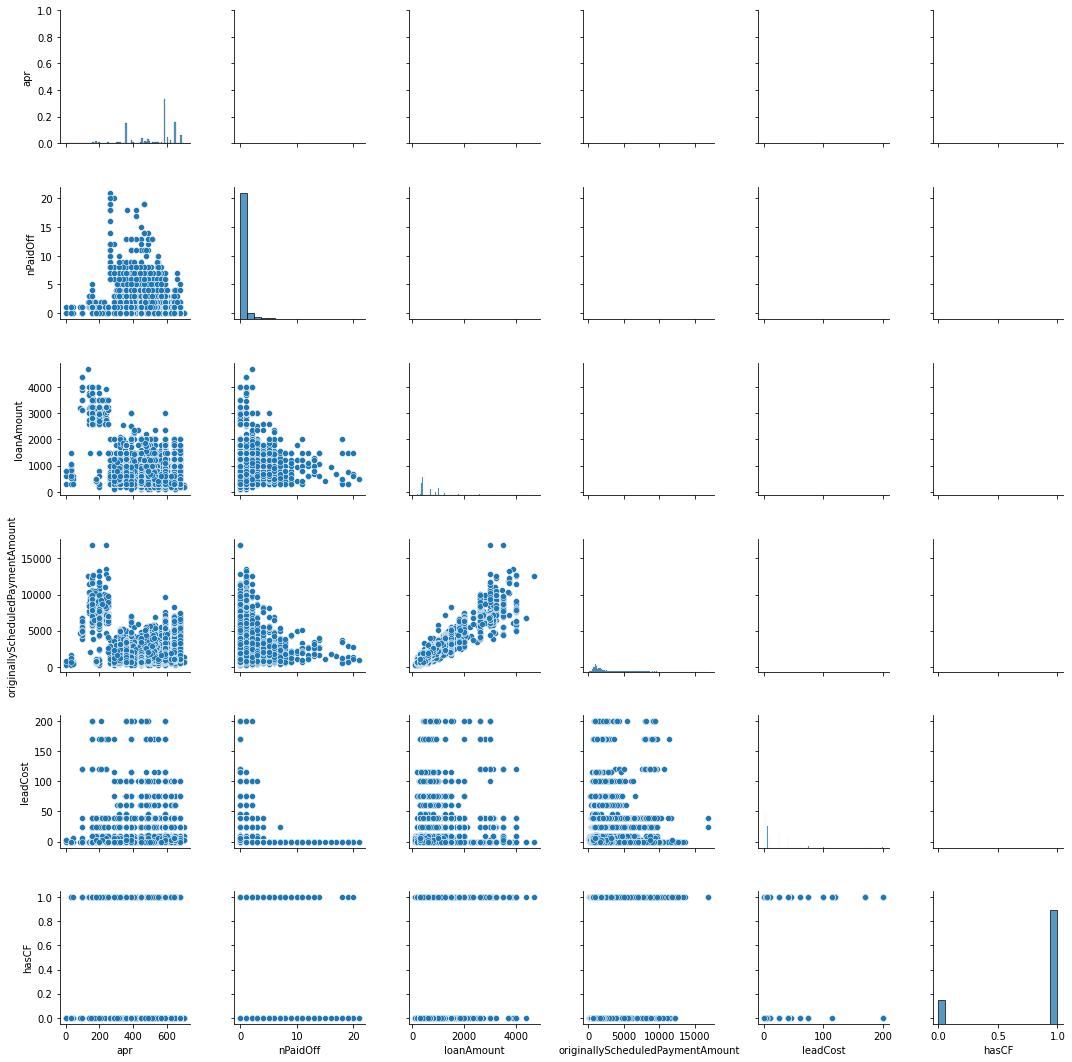

In [14]:
# Histogram and scatterplot Matrix of the dataset
g = sns.PairGrid(funded)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

<b> The Pairplot doesnot show any linear relationship between two variables except 'loanAmount' and 'orginallyScheduledPaymentAmount'. 
Histogram plotted diagonally also does not show any normal distribusion. </b>

## Analysis of Lead Cost and Types

In [15]:
# Counts of diffeerent types of Lead cost
counts=funded['leadType'].value_counts()

# Total cost of each lead types 
sum_cost=funded.groupby('leadType')['leadCost'].sum()

# Average lead cost for each types
mean_cost=funded.groupby('leadType')['leadCost'].mean()

# Total Loan amount for each lead type
loan_amount= funded.groupby('leadType')['loanAmount'].sum()

# Merging together for comparison
cost_analysis= pd.concat((counts.rename('Count'),sum_cost.rename('Total Cost'), 
           mean_cost.rename('Mean'), loan_amount.rename('Loan Amount')),axis=1)
cost_analysis['Cost percentage']=  cost_analysis['Total Cost']/cost_analysis['Loan Amount']

# View Comparison table
cost_analysis

,Count,Total Cost,Mean,Loan Amount,Cost percentage
bvMandatory,16569,79064,4.771803,7641333.0,0.010347
lead,11572,376540,32.538887,8517207.0,0.044209
organic,7598,1407,0.185180,5094062.0,0.000276
rc_returning,1843,0,0.000000,1215424.0,0.000000
prescreen,1307,0,0.000000,2291706.0,0.000000
california,49,7700,157.142857,136850.0,0.056266
express,16,0,0.000000,11850.0,0.000000
lionpay,10,0,0.000000,8231.0,0.000000
repeat,9,0,0.000000,8600.0,0.000000
instant-offer,9,0,0.000000,12600.0,0.000000


<b>Observations are-
    
    1. Most number of loans generated through 'bvMandatory' where bank verification is mandatory.
    
    2. Most amount of loan generated by 'lead' where bank verification is not mandatory.
    
    3. Average cost per loan in highest in California. It is understandable as cost may increase due to strict regulations and adherence. 
    4. No cost reported for 'returning', 'prescreen', 'express', 'lionpay', 'instant-offer' and 'repeat'.
    
    5. Interesting to see 'Prescreen' did not cost anything. In this process, prequilified customers mailed to take loan. Surely there are mailing cost involved unless it is categorized under operational expenses. 
    </b>

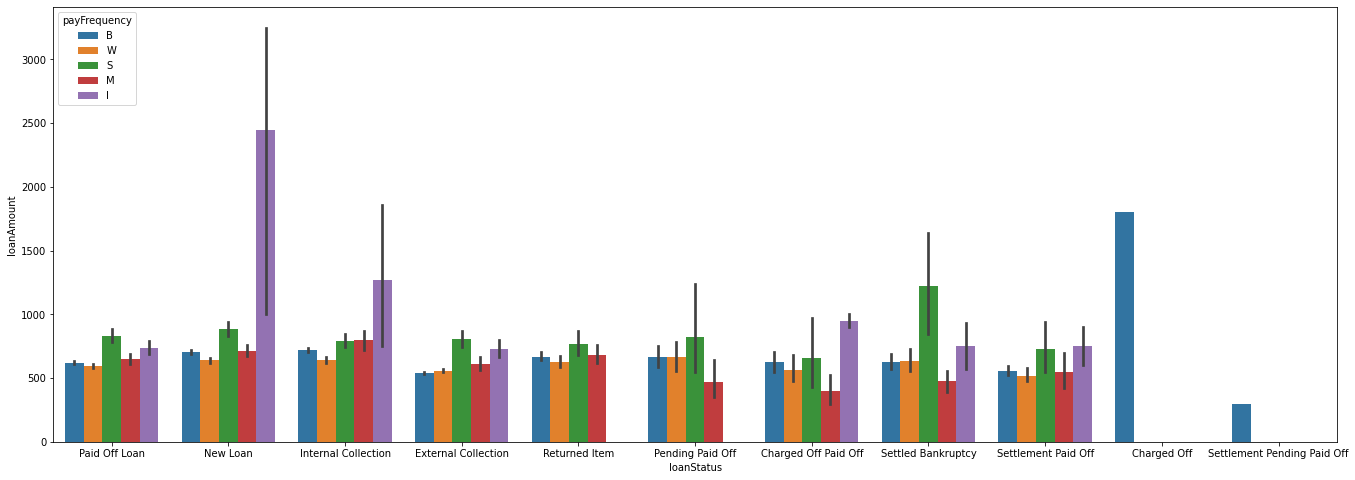

In [17]:
# Barchart loan Status vs Loan amount grouped by pay frequency
plt.figure(figsize= (23,8))
sns.barplot(x="loanStatus", y="loanAmount", hue="payFrequency", data=funded)

<b>Irregular Payments are highest in terms of average loan amount within 'new loan', 'internal collection', 'Charged off Paid Off' and 'Settlement Paid Off'. Generally Semi monthly payments are more preffered mode of payment across all groups.</b>

In [18]:
from statsmodels.multivariate.manova import MANOVA
maov = MANOVA.from_formula('loanStatus + payFrequency ~ loanAmount + leadCost', data=funded)
print(maov.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept                Value          Num DF   Den DF           F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 15.0000 38965.0000 -974904219336065664.0000 1.0000
         Pillai's trace                1.0000 15.0000 38965.0000 -974904219336065664.0000 1.0000
 Hotelling-Lawley trace -375299968947542.3125 15.0000 38965.0000 -974904219336065664.0000 1.0000
    Roy's greatest root -375299968947542.3125 15.0000 38965.0000 -974904219336065664.0000 1.0000
------------------------------------------------------------------------------------------------
                                                                  

## Missing Values Imputation

In [19]:
# Identifying missing values in the funded dataset
funded.isnull().sum().sort_values(ascending=False)

clarityFraudId                      6622
nPaidOff                              21
fpStatus                               9
hasCF                                  0
leadCost                               0
leadType                               0
state                                  0
originallyScheduledPaymentAmount       0
loanAmount                             0
loanStatus                             0
originatedDate                         0
applicationDate                        0
apr                                    0
payFrequency                           0
anon_ssn                               0
loanId                                 0
dtype: int64

<b> Only 'clarityFraudId', 'nPaidOff', and 'fpStatus' has missing values. However, 'clarityFraudId' being an ID column we will not do any imputation in this column.</b>

In [20]:
# Imputation of missing values in 'nPaidOff' and 'fpStatus' with median and mode repectively
funded['nPaidOff']= funded['nPaidOff'].fillna(funded['nPaidOff'] .median())
funded['fpStatus']= funded[['fpStatus']].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [21]:
# Imputation of 'nPaidOff' and 'fpStatus' variables
# No imputation on 'clarityFraudId' because it is an ID
funded.isnull().sum().sort_values(ascending=False)

clarityFraudId                      6622
hasCF                                  0
fpStatus                               0
leadCost                               0
leadType                               0
state                                  0
originallyScheduledPaymentAmount       0
loanAmount                             0
loanStatus                             0
nPaidOff                               0
originatedDate                         0
applicationDate                        0
apr                                    0
payFrequency                           0
anon_ssn                               0
loanId                                 0
dtype: int64

<b>No missing values showing in 'nPaidOff' and 'fpStatus' after imputation.

However, we are building a model to see whether a customer is eligible for a loan or a potential defaulters. first payment status will not be available for new customer to MoneyLion. Hence we will not use 'fpStatus' in our training stage.  </b>

## Analysis of Loan Status 

In [22]:
# Counts of unique values in "loanStatus" Variable
loan_status_count = funded['loanStatus'].value_counts()

# Loan Amount per Loan Status type
amount_by_status= funded.groupby('loanStatus')['loanAmount'].sum()

# Average loan aount per loan status
average = amount_by_status/loan_status_count

# Combining Count and Amount per status
pd.concat((loan_status_count.rename('Count'),amount_by_status.rename('Total_Loan_Amount'), average.rename('Average')),axis=1)

,Count,Total_Loan_Amount,Average
Paid Off Loan,11427,7231496.0,632.842916
External Collection,11334,6390019.0,563.792042
New Loan,8112,5742605.5,707.914879
Internal Collection,5564,3956486.5,711.086718
Returned Item,1182,798020.0,675.143824
Settlement Paid Off,708,392188.0,553.937853
Settled Bankruptcy,325,216186.0,665.187692
Pending Paid Off,169,111962.0,662.497041
Charged Off Paid Off,159,96800.0,608.805031
Settlement Pending Paid Off,1,300.0,300.000000


<b>A large portion of all loans are still outstanding under internal and external collection.</b>

# Construction of the Target Variable
MoneyLion would be interested to provide loans to customers who are able to pay off loan. We re-label the 'loanStatus' values in to two categories 0 and 1. 0 categories will be assiged to the customers who paid off the loan and 1 will be assigned to the loans that are not been paid and potential defaulters.

#### 'target' - 1 : Potential Defaulters
Settled Bankcruptcy: Bankcrupt.
Charged Off: Amount of debt is unlikely to be collected.
Charged off Paid Off: consider account close eventhough debt still owing, but they paid off the debt in the future.
External Collection: Another company used to recover debt
Internal Collection: MoneyLion trying to recover debt

#### 'target' - 0: Non Defaulters
Paid Off Loan: The loan was paid off
Settlement Paid Off
  
In this scenario, we can not consider 'New Loan', 'Returned Item', 'Settlement Pending Paid Off' and 'Pending Paid Off' in the model or for any other analysis as the outcomes of these loan statuses are at the very initial stage. Including these data in the model might have an inverse effect which will result inaacuracies while predicting the outcome.

In [23]:
# Relabeling loan Status to good customer(0) and and not so good customer(1)
status = {1:['Settled Bankruptcy',
              'Charged Off',
              'Charged Off Paid Off',
              'Internal Collection',
              'External Collection'], 
          0:['Paid Off Loan',             
             'Settlement Paid Off']}

In [24]:
# Creating a function to create a new target label
def target(x):
    '''
    this function takes the 'loanstatus' and maps them to the respective
    target groups
    '''
    for y,z in status.items():
        if x in z:
            return y

In [25]:
#Creating 'target' variable using previously defined function
funded['target'] = funded['loanStatus'].map(target)

# Dropping Null values in the target Variable and resetting index
funded_class = funded[funded['target'].notna()].reset_index(drop=True)

# Converting data types from float to integer
funded_class['target'] = funded_class['target'].astype(int)

# View Modified Dataset with categorical 'target' variable
funded_class.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,target
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,0
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,Paid Off Loan,1250.0,3313.78,MO,organic,0,Checked,58450a15e4b0bb9d6d7344c7,1,0
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,Checked,578f9346e4b0810ad5e7b72e,1,0
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,W,404.1,2016-05-25 03:05:18.849,2016-05-25 15:11:36.260,3.0,Paid Off Loan,300.0,422.64,WI,organic,0,Checked,56621584e4b0100e84141586,1,0
4,LL-I-18297678,bc500677542783c43842d54e34830f08,B,315.0,2017-03-12 18:24:46.356,2017-03-12 19:00:23.818,2.0,Internal Collection,1500.0,2875.27,IL,organic,0,Rejected,579101e7e4b0810ad80e43aa,1,1


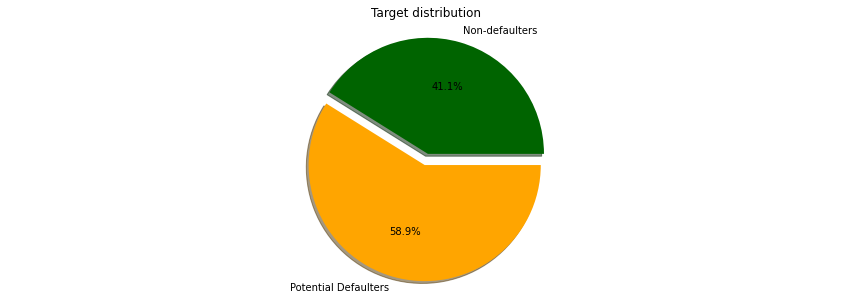

In [26]:
# Distribution of 'target' variable with a pie chart
value= funded_class["target"].value_counts(normalize = True)
colors = ['orange', 'darkgreen']
labels = ['Potential Defaulters', 'Non-defaulters']
explode = (0.1, 0)
fig = plt.figure(figsize =(15, 5))
fig.set_facecolor('white') 
plt.pie(value, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True, textprops = dict(color ="Black"))
plt.title('Target distribution')
plt.axis('equal')
plt.show()

<b>According to new category created from loan status potential defaulters are larger portion than non defaulted loan account. </b>

## Bivariate Analysis with target variable

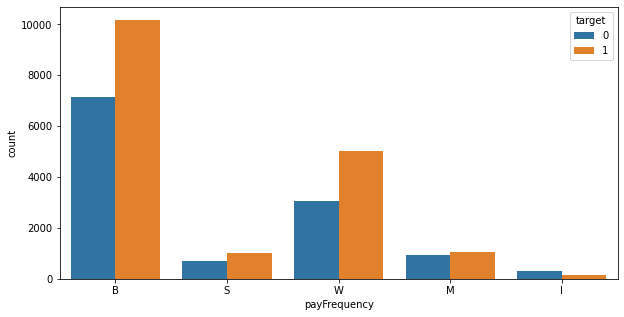

In [27]:
# Pay frequency grouped by target customers.
plt.figure(figsize= (10,5))
sns.countplot(x="payFrequency", hue="target", data=funded_class)

<b>Bi weekly payment mode is the most popular among both good customers and defaulted customers followed by weekly payments. </b>

In [28]:
#create a contigency table to do a chi square test
contingency_table= pd.crosstab(funded_class["payFrequency"],
                            funded_class["target"], 
                               margins = False)

In [29]:
# chi-squared test to see if these variable are independent
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'degree of freedom={dof}')

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print(f'probability={prob:.3f}, critical={critical:.3f}, stat={stat:.3f}' )

# interpret p-value
alpha = 1.0 - prob
print(f'significance={alpha:.2f}, p={p_value:.3f}')
if p_value <= alpha:
	print('Dependent (reject H0: Relation between these two variable exists)')
else:
	print('Independent (fail to reject H0: No relation)')

degree of freedom=4
probability=0.950, critical=9.488, stat=207.038
significance=0.05, p=0.000
Dependent (reject H0: Relation between these two variable exists)


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

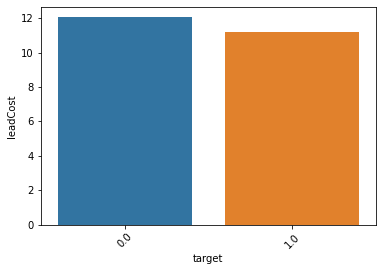

In [30]:
# Average lead cost by target group
f=funded.groupby('target')['leadCost'].mean().sort_values()
sns.barplot(x=f.index, y= f)
plt.xticks(rotation=45)

In [31]:
# T-test to check whether the mean difference are significant
from scipy import stats
stats.ttest_ind(funded_class["leadCost"], funded_class["target"])

Ttest_indResult(statistic=87.4213530468748, pvalue=0.0)

<b>Interstingly, Lead cost for target customer 1, who are potential defaulters, are comparatively higher than the good customer group 0 and it is also statistically sgnificant as shown by the p-value.</b>

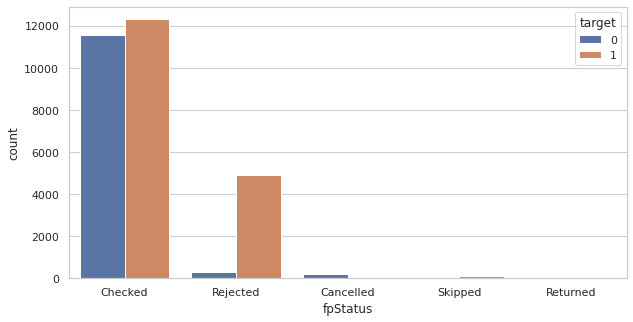

In [71]:
# First Payment status by target group
plt.figure(figsize= (10,5))
sns.countplot(x="fpStatus", hue="target", data=funded_class)
plt.show()

<b>A large number of defaulted customer has rejected the first payment.We can conculde, it is a good sign that a customer is likely to default when their first payment is rejected.

But including this feature causes a different problem. When a new customer applies for a loan, we will not have this information. So we will not include this feature in the model</b>

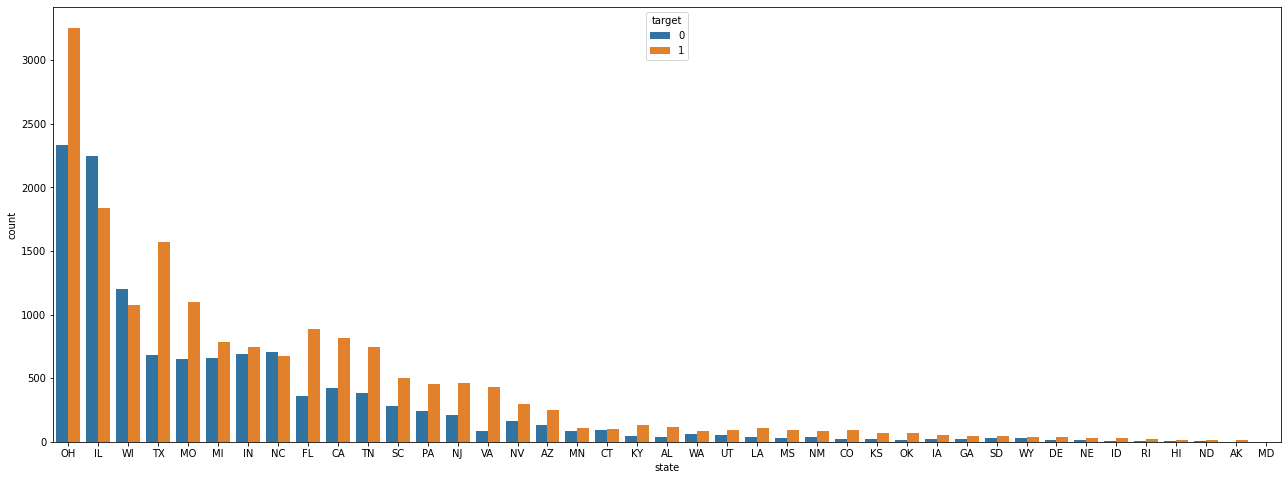

In [33]:
# Bar Chart for State wise target group
s=funded.groupby([ 'state', 'target'])['target'].count().reset_index(name="count").sort_values(['count'], ascending=False)
plt.figure(figsize= (22,8))
sns.countplot(x="state", hue="target", data=funded_class, order = funded_class['state'].value_counts().index)
plt.show()

<b> Illinois(IL), Wisconsin(WI), and North Carolina(NC) has more good customers than defaulted customers. </b>

**Encoding 44 states available in the dataset is a challenge. It increases the dimensionality without much predictive power to the model. Encoding high cardinlity data is an issue that faced by Data Scientist often. May be replacing the state column with existing default ratio per state can help to reduce the complexity and improve the model.**

In [34]:
# Calculate the default ratio per state
state= pd.crosstab(funded_class["state"], funded_class["target"], margins = False, )
state['Default_ratio_per_state']= state[1]/(state[0]+1) # added 1 to avoid infinity error
state= state.drop([0, 1], axis=1)
state.index.set_names('state', inplace=True)
state.head()

target,Default_ratio_per_state
state,
AK,13.000000
AL,3.025641
AZ,1.830882
CA,1.901639
CO,3.760000


In [35]:
# inner joining ratio with the 'funded_class' dataset on 'state'
funded_class= pd.merge(funded_class, state, on='state', how='inner')
funded_class.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,target,Default_ratio_per_state
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,0,1.901639
1,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,Checked,578f9346e4b0810ad5e7b72e,1,0,1.901639
2,LL-I-11462356,51db602c1b1f0188e409df8c872e7750,B,199.0,2016-08-25 19:39:50.049,2016-08-30 15:39:33.206,0.0,External Collection,3000.0,6651.74,CA,prescreen,0,Checked,57bf4981e4b033e6e9914132,1,1,1.901639
3,LL-I-08702744,4fd612cc7997a3a100ee9bd0a69ffb2a,M,251.0,2016-04-14 13:53:15.652,2016-04-14 15:03:08.306,0.0,Paid Off Loan,2600.0,6435.35,CA,prescreen,0,Checked,570fa0c5e4b06ef485d74a90,1,0,1.901639
4,LL-I-12203495,726df523f8344aea16d3c550c4d3802a,B,208.0,2016-11-22 23:08:45.558,2016-11-23 00:18:28.867,1.0,External Collection,2600.0,7991.80,CA,organic,0,Checked,NaN,0,1,1.901639


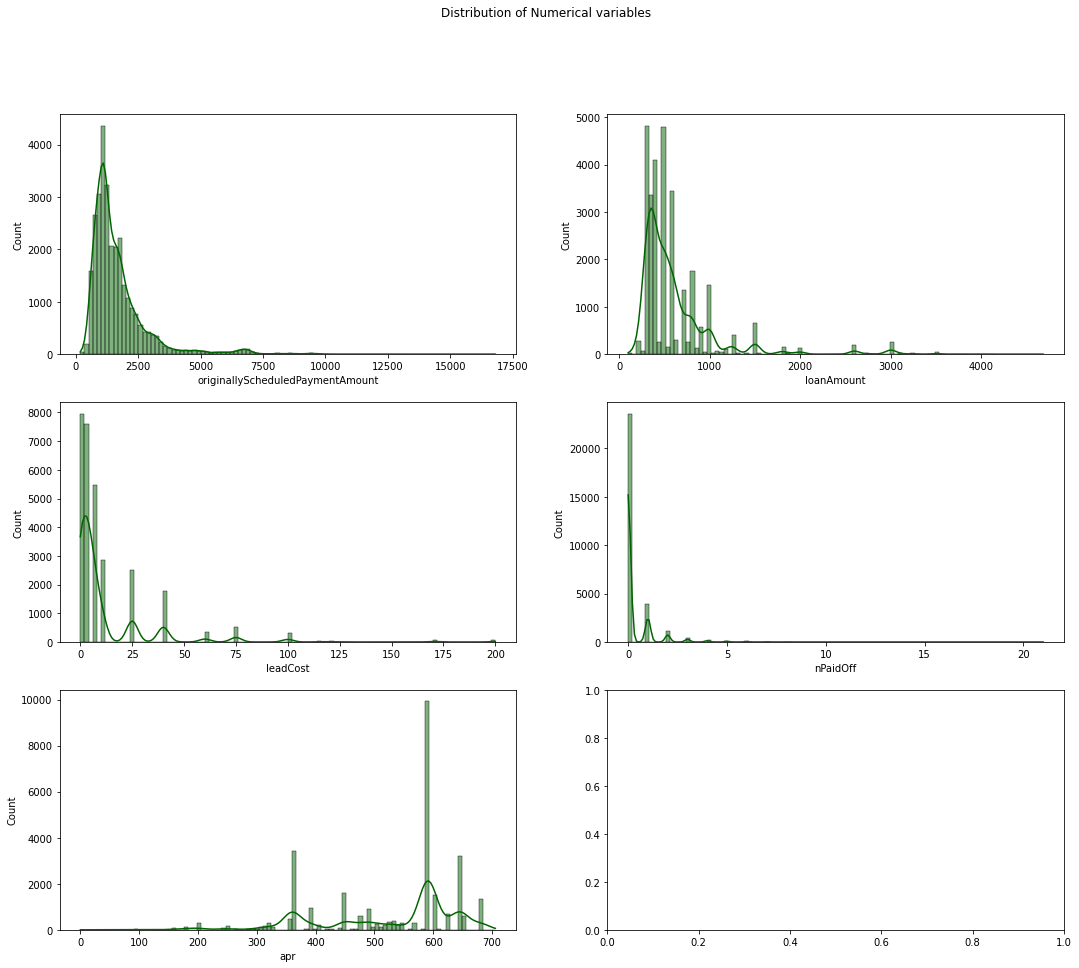

In [36]:
# Histogram with KDE of Numerical variables
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Distribution of Numerical variables')
cols= ['originallyScheduledPaymentAmount', 'loanAmount', 'nPaidOff', 'leadCost' ]
sns.histplot(ax=axes[0,0], x= funded_class['originallyScheduledPaymentAmount'],bins=100,color='darkgreen', kde= True)
sns.histplot(ax=axes[0,1], x= funded_class['loanAmount'],bins=100,color='darkgreen', kde= True)
sns.histplot(ax=axes[1,0], x= funded_class['leadCost'],bins=100,color='darkgreen', kde= True)
sns.histplot(ax=axes[1,1], x= funded_class['nPaidOff'],bins=100,color='darkgreen', kde= True)
sns.histplot(ax=axes[2,0], x= funded_class['apr'],bins=100,color='darkgreen', kde= True)
plt.show()

<b>1. The originally scheduled payment amount are right skewed and the peak is around $1000. 

2. the loan amount are right skewed and the peak is around $300.
    
3. Lead Cost is also right skewed most are below 10.
    
4. Number of paid off previous loans are mostly 0 and the variable is also right skewed.
    
5. APR has a peak near 600 and this variable is left skewed. </b>

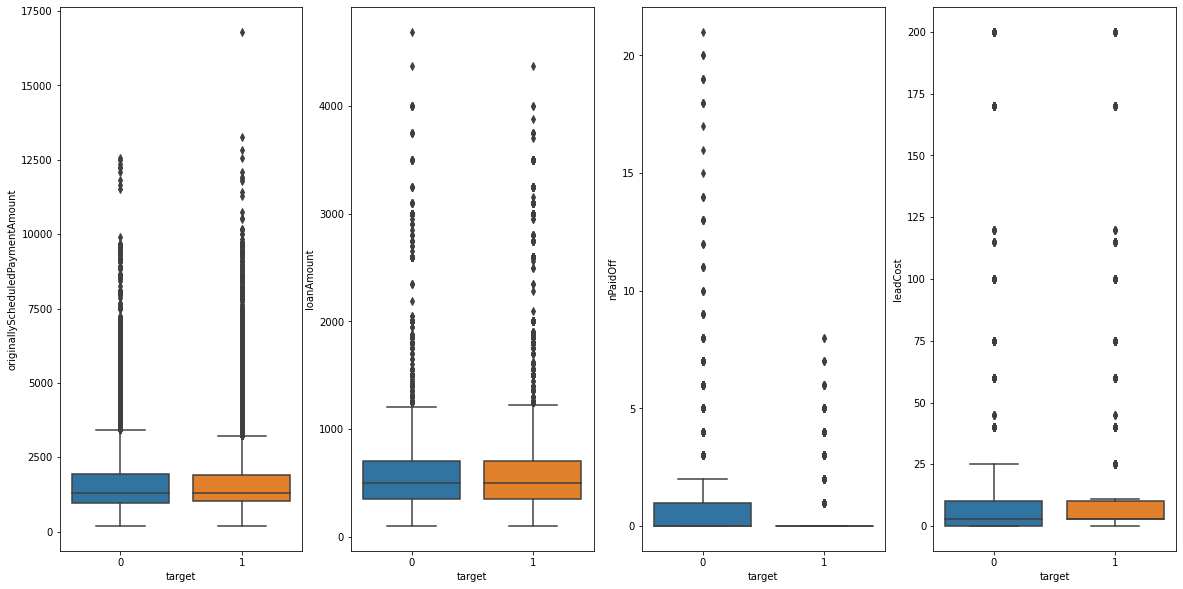

In [37]:
# Outlier Detection
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
cols= ['originallyScheduledPaymentAmount', 'loanAmount', 'nPaidOff', 'leadCost']
for i,t in enumerate(cols):
    sns.boxplot(y=t, x= "target", data=funded_class,  orient='v', ax=axes[i % 4])

<b> Outliers are present in all valriables- 'originallyScheduledPaymentAmount', 'loanAmount', 'nPaidOff', and 'leadCost'. We will not remove the outliers completely. Some modelling techniques are less sensitive to outliers. Also quantile transformation reduce the effect of outliers. We will use this method in preprocessing. </b>

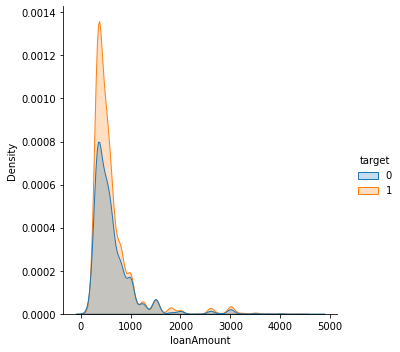

In [38]:
sns.displot(funded_class, x="loanAmount", hue="target", kind="kde", fill=True)

<b>The figure above shows right skewed on target '0' (the client we target) which having the peak around 300 and target '1' (defaulters or potential defaulters) has peak around 400. </b>

# Payment Dataset

In [39]:
payment = pd.read_csv('./data/payment.csv',parse_dates=['paymentDate'])
payment

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19 05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02 05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16 05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30 05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13 05:00:00,43.89,125.72,169.61,Checked,NaN
...,...,...,...,...,...,...,...,...,...
689359,LL-I-18629478,8,False,2017-07-14 04:00:00,45.62,17.67,63.29,None,NaN
689360,LL-I-18629478,9,False,2017-07-31 04:00:00,45.67,17.62,63.29,None,NaN
689361,LL-I-18629478,10,False,2017-08-15 04:00:00,51.12,12.17,63.29,None,NaN
689362,LL-I-18629478,11,False,2017-08-31 04:00:00,54.35,8.94,63.29,None,NaN


In [40]:
payment.info()
payment.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689364 entries, 0 to 689363
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   loanId             689364 non-null  object        
 1   installmentIndex   689364 non-null  int64         
 2   isCollection       689364 non-null  bool          
 3   paymentDate        689364 non-null  datetime64[ns]
 4   principal          689364 non-null  float64       
 5   fees               689364 non-null  float64       
 6   paymentAmount      689364 non-null  float64       
 7   paymentStatus      689364 non-null  object        
 8   paymentReturnCode  31533 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 42.7+ MB


(689364, 9)

In [41]:
payment.describe(include='all')

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
count,689364,689364.000000,689364,689364,689364.000000,689364.000000,689364.000000,689364,31533
unique,39952,NaN,2,18436,NaN,NaN,NaN,9,31
top,LL-I-12230332,NaN,False,2017-03-31 04:00:00,NaN,NaN,NaN,Cancelled,R01
freq,105,NaN,675469,10236,NaN,NaN,NaN,270334,22866
first,NaN,NaN,NaN,2014-12-09 05:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-02-26 05:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.553222,NaN,NaN,45.557543,67.003994,112.680232,NaN,NaN
std,NaN,8.049530,NaN,NaN,81.724683,59.789510,105.783710,NaN,NaN
min,NaN,1.000000,NaN,NaN,-303.370000,-42.560000,-337.700000,NaN,NaN
25%,NaN,5.000000,NaN,NaN,13.180000,28.820000,56.810000,NaN,NaN


<b>More information required to understand why there are negative values in the 'principal', 'fees' and 'paymentAmount'. 
Most Frequent payment status is "cancelled". More analysis is required to understand why most payments are being cancelled. </b>

In [42]:
# Payment status grouped by Loan ID
payment.groupby(['loanId', 'paymentStatus'])['paymentStatus'].count()

loanId         paymentStatus
LL-I-00000021  Checked          12
               Rejected          1
LL-I-00000231  Cancelled         8
               Checked           2
               None              8
                                ..
LP-I-00000139  Checked          12
               Rejected          3
LP-I-00000142  Cancelled        12
               Skipped           1
LP-I-00000145  Checked          12
Name: paymentStatus, Length: 99456, dtype: int64

**Payment dataset contains information about loan repayment in installment. Again when assessing credit risks for new customer we will not have these information. So these feature will not be used in the model training.**

# Merge with Clarity Dataset

In [43]:
underwriting = pd.read_csv('./data/clarity_underwriting_variables.csv')
underwriting

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators,.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithaddress,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryageyoungerthanssnissuedate,.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresscautious,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddressnonresidential,.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddresshighrisk,.underwritingdataclarity.clearfraud.clearfraudindicator.ssnreportedmorefrequentlyforanother,.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbytradeopenlt90days,.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid,.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnissuedatecannotbeverified,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresscautious,.underwritingdataclarity.clearfraud.clearfraudindicator.morethan3inquiriesinthelast30days,.underwritingdataclarity.clearfraud.clearfraudindicator.onfileaddressnonresidential,.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedpriortossnissuedate,.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid,.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryaddresshighrisk,.underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile,.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified,.underwritingdataclarity.clearfraud.clearfraudindicator.highprobabilityssnbelongstoanother,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased,.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly,.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18,.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate,.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile,.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone,.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamematch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncodedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncodedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudiden

In [44]:
# Renaming the columns for better readability 
import re
df_regex= underwriting
df_regex.rename(columns=lambda x: re.sub(".underwritingdataclarity.clearfraud.clearfraud", "", x), inplace=True)

In [45]:
df_regex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   inquiry.thirtydaysago                                  49750 non-null  float64
 1   inquiry.twentyfourhoursago                             49750 non-null  float64
 2   inquiry.oneminuteago                                   49750 non-null  float64
 3   inquiry.onehourago                                     49750 non-null  float64
 4   inquiry.ninetydaysago                                  49750 non-null  float64
 5   inquiry.sevendaysago                                   49750 non-null  float64
 6   inquiry.tenminutesago                                  49750 non-null  float64
 7   inquiry.fifteendaysago                                 49750 non-null  float64
 8   inquiry.threesixtyfivedaysago                 

<b>Most variables in this dataset are used to calculate fraud score. So we will only retain 'clearfraudscore' and 'underwritingid' from this dataset.

However, these predictor variables individually can have more influence than "clearfraudscore". Adding all of them in the training will increase the dimensinality and make the model very complex. Some sort of feature importance/ selection techniques can be used to to reduce the complexity. </b>

In [46]:
# Subset 2 important attributes for merging purposes.
fraudscore=underwriting[['clearfraudscore','underwritingid']]

# Then merge with 'payment_loan_merged' dataset
df_loan_with_clearfraudscore = funded_class.merge(fraudscore,left_on='clarityFraudId',right_on='underwritingid',how='left')

In [72]:
# Check for missing values
df_loan_with_clearfraudscore.isnull().sum().sort_values(ascending=False)

clearfraudscore                     5116
underwritingid                      5033
clarityFraudId                      4997
loanAmount                             0
anon_ssn                               0
payFrequency                           0
apr                                    0
applicationDate                        0
originatedDate                         0
nPaidOff                               0
loanStatus                             0
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
fpStatus                               0
hasCF                                  0
target                                 0
Default_ratio_per_state                0
loanId                                 0
dtype: int64

<b> 3 attributes has missing values. We will only impute 'clearfraudscore' as underwritingid and clarityFraudid are ID.
</b>

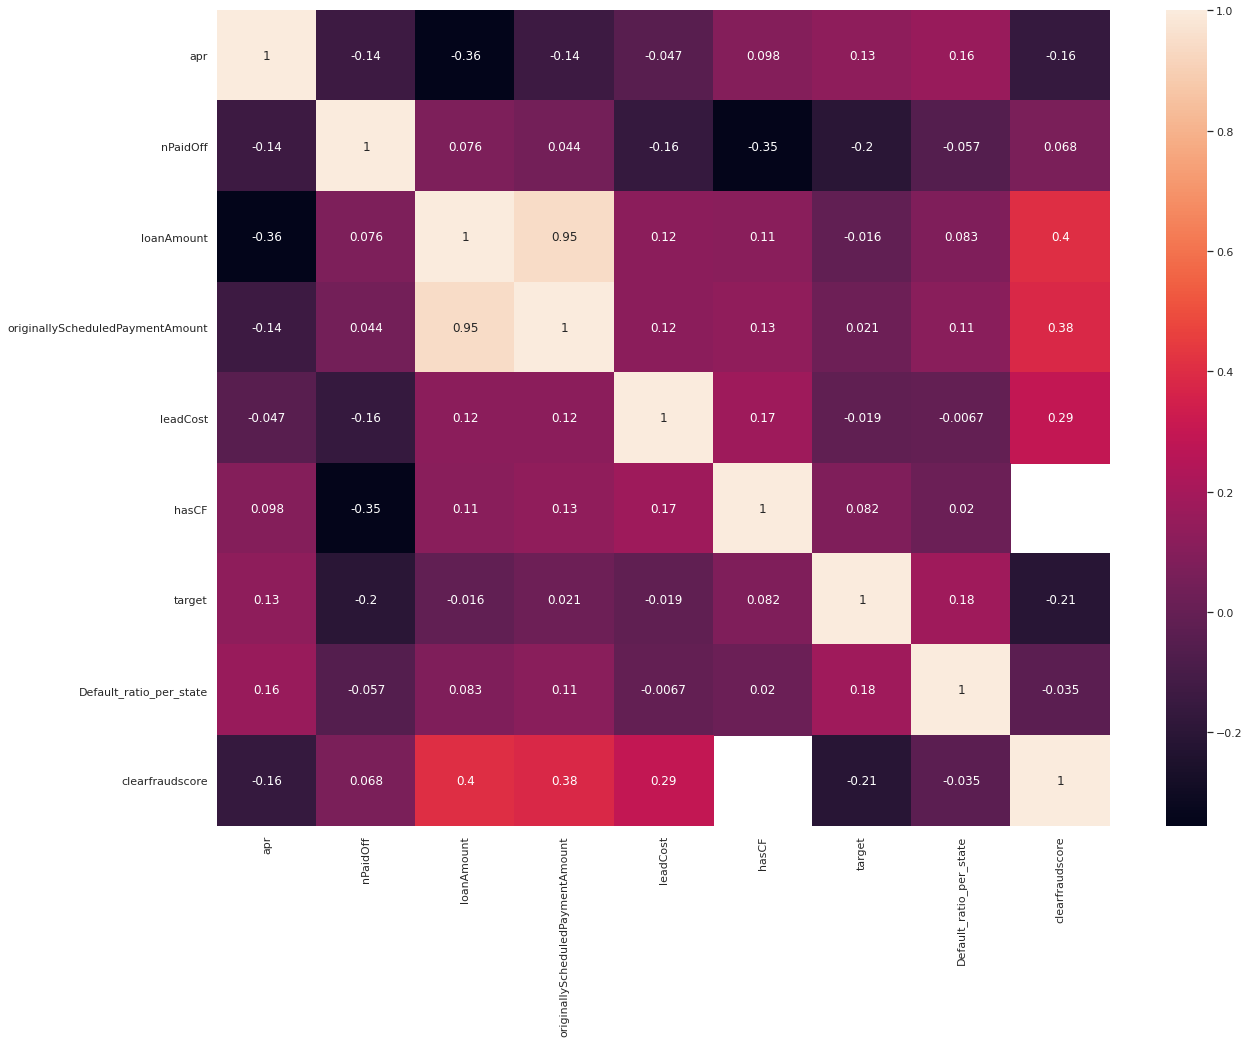

In [78]:
# Correlation plot of numerical vaariables in the the dataset
Corr= df_loan_with_clearfraudscore.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(Corr, annot= True)
plt.show()

<b>1. Correlation plot shows there are high multi-collinearity among variables 'loanAmount' and 'originallyScheduledPaymentAmount' which is 0.95.
    
2. 'clearfraudscore' are positively correlated with 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', and 'inquiry.oneminuteago'. Therefore, we will use these attributes to perform KNN imputation on 'clearfraudscore'</b>

# KNN Imputation of Missing Values in 'clearfraudscore' Variable

In [83]:
# Columns selected for imputation process
cols=['loanAmount','clearfraudscore','leadCost','originallyScheduledPaymentAmount']

# df1 ==> Dataset with no imputed attributes
df1 = df_loan_with_clearfraudscore.drop(cols,axis=1)

# df2 ==> Attributes for imputation
df2 = df_loan_with_clearfraudscore[cols]

In [84]:
from sklearn.impute import KNNImputer

# Defining imputer object
imputer = KNNImputer(n_neighbors=2)

# Applying fit_transform on the dataset
df2_imputed = imputer.fit_transform(df2)

# Converting to Pandas Dataframe
df2_imputed = pd.DataFrame(df2_imputed)

#Renaming the columns
df2_imputed = df2_imputed.rename(columns = {0:'loanAmount', 
                                            1:'clearfraudscore', 
                                            2:'leadCost',
                                            3:'originallyScheduledPaymentAmount'})
df2_imputed.head()

,loanAmount,clearfraudscore,leadCost,originallyScheduledPaymentAmount
0,3000.0,879.0,0.0,6395.19
1,800.0,624.0,10.0,2432.08
2,3000.0,831.0,0.0,6651.74
3,2600.0,949.0,0.0,6435.35
4,2600.0,854.0,0.0,7991.80


In [90]:
# Concatenate dataset and formed imputed 'clearfraudscore' dataset
combined_df = pd.concat([df1,df2_imputed], axis=1, sort=False)
combined_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,state,leadType,fpStatus,clarityFraudId,hasCF,target,Default_ratio_per_state,underwritingid,loanAmount,clearfraudscore,leadCost,originallyScheduledPaymentAmount
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,Paid Off Loan,CA,prescreen,Checked,569eb3a3e4b096699f685d64,1,0,1.901639,569eb3a3e4b096699f685d64,3000.0,879.0,0.0,6395.19
1,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,Paid Off Loan,CA,bvMandatory,Checked,578f9346e4b0810ad5e7b72e,1,0,1.901639,578f9346e4b0810ad5e7b72e,800.0,624.0,10.0,2432.08
2,LL-I-11462356,51db602c1b1f0188e409df8c872e7750,B,199.0,2016-08-25 19:39:50.049,2016-08-30 15:39:33.206,0.0,External Collection,CA,prescreen,Checked,57bf4981e4b033e6e9914132,1,1,1.901639,57bf4981e4b033e6e9914132,3000.0,831.0,0.0,6651.74
3,LL-I-08702744,4fd612cc7997a3a100ee9bd0a69ffb2a,M,251.0,2016-04-14 13:53:15.652,2016-04-14 15:03:08.306,0.0,Paid Off Loan,CA,prescreen,Checked,570fa0c5e4b06ef485d74a90,1,0,1.901639,570fa0c5e4b06ef485d74a90,2600.0,949.0,0.0,6435.35
4,LL-I-12203495,726df523f8344aea16d3c550c4d3802a,B,208.0,2016-11-22 23:08:45.558,2016-11-23 00:18:28.867,1.0,External Collection,CA,organic,Checked,NaN,0,1,1.901639,NaN,2600.0,854.0,0.0,7991.80


In [91]:
# Check any missing values other than id variables
combined_df.isnull().sum().sort_values(ascending=False)

underwritingid                      5033
clarityFraudId                      4997
originallyScheduledPaymentAmount       0
state                                  0
anon_ssn                               0
payFrequency                           0
apr                                    0
applicationDate                        0
originatedDate                         0
nPaidOff                               0
loanStatus                             0
leadType                               0
leadCost                               0
fpStatus                               0
hasCF                                  0
target                                 0
Default_ratio_per_state                0
loanAmount                             0
clearfraudscore                        0
loanId                                 0
dtype: int64

**Note: Imputation is not required on ID columns**

# Feature Engineering 

In [92]:
# Count of loan per SSN or customers
combined_df['ssnLoanCount'] = combined_df['anon_ssn'].map(combined_df.groupby('anon_ssn')['loanId'].size())

# Time Taken to Approve Loan
combined_df['HoursTaken'] = (combined_df['originatedDate'] - combined_df['applicationDate']).astype('timedelta64[h]').astype(int)
combined_df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,state,leadType,fpStatus,clarityFraudId,hasCF,target,Default_ratio_per_state,underwritingid,loanAmount,clearfraudscore,leadCost,originallyScheduledPaymentAmount,ssnLoanCount,HoursTaken
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,Paid Off Loan,CA,prescreen,Checked,569eb3a3e4b096699f685d64,1,0,1.901639,569eb3a3e4b096699f685d64,3000.0,879.0,0.0,6395.19,1,17
1,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,Paid Off Loan,CA,bvMandatory,Checked,578f9346e4b0810ad5e7b72e,1,0,1.901639,578f9346e4b0810ad5e7b72e,800.0,624.0,10.0,2432.08,1,53
2,LL-I-11462356,51db602c1b1f0188e409df8c872e7750,B,199.0,2016-08-25 19:39:50.049,2016-08-30 15:39:33.206,0.0,External Collection,CA,prescreen,Checked,57bf4981e4b033e6e9914132,1,1,1.901639,57bf4981e4b033e6e9914132,3000.0,831.0,0.0,6651.74,1,115
3,LL-I-08702744,4fd612cc7997a3a100ee9bd0a69ffb2a,M,251.0,2016-04-14 13:53:15.652,2016-04-14 15:03:08.306,0.0,Paid Off Loan,CA,prescreen,Checked,570fa0c5e4b06ef485d74a90,1,0,1.901639,570fa0c5e4b06ef485d74a90,2600.0,949.0,0.0,6435.35,1,1
4,LL-I-12203495,726df523f8344aea16d3c550c4d3802a,B,208.0,2016-11-22 23:08:45.558,2016-11-23 00:18:28.867,1.0,External Collection,CA,organic,Checked,NaN,0,1,1.901639,NaN,2600.0,854.0,0.0,7991.80,1,1


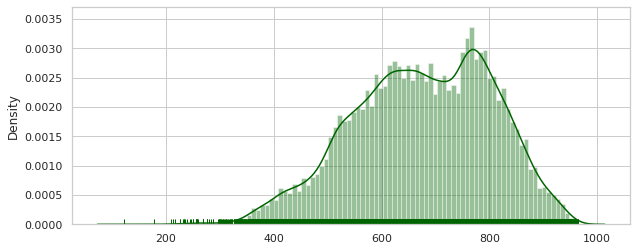

In [96]:
# Distribution of 'clearfraudscore'
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
sns.distplot(combined_df[['clearfraudscore']],
             bins=100,
             color='darkgreen',
             rug=True)
plt.show()

<b>The figure above shows clearfraud score have the peak around 780. </b>

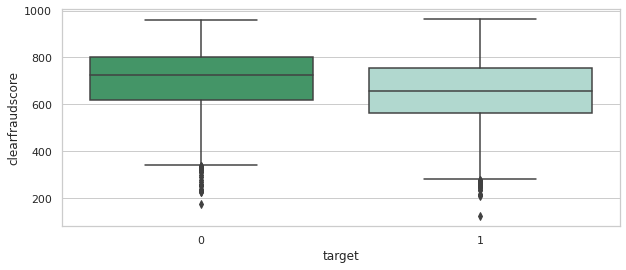

In [95]:
# Boxplot of 'clearfraudscore'
plt.figure(figsize=(10, 4))
sns.boxplot(x = 'target',
            y="clearfraudscore", 
            palette=("BuGn_r"),
            data=combined_df)
plt.show()

<b>Boxplot of "clearfraudscore" shows the median of 'target 0' is slightly higher than 'target 1'.</b>

## Log Transformation of the Right Skewed Variables

In [97]:
# apply log(x+1) element-wise to a subset of columns
to_log = ['originallyScheduledPaymentAmount', 'loanAmount', 'nPaidOff', 'leadCost' ]
df_log = combined_df[to_log].applymap(lambda x: np.log(x+1))

# rename columns
df_log.columns = 'log_' + df_log.columns
df_log

,log_originallyScheduledPaymentAmount,log_loanAmount,log_nPaidOff,log_leadCost
0,8.763458,8.006701,0.000000,0.000000
1,7.796913,6.685861,0.000000,2.397895
2,8.802784,8.006701,0.000000,0.000000
3,8.769717,7.863651,0.000000,0.000000
4,8.986296,7.863651,0.693147,0.000000
...,...,...,...,...
29513,7.223361,6.216606,0.000000,1.386294
29514,6.774841,5.707110,1.098612,0.000000
29515,7.634622,6.398595,0.000000,1.945910
29516,6.345987,6.272877,0.000000,0.000000


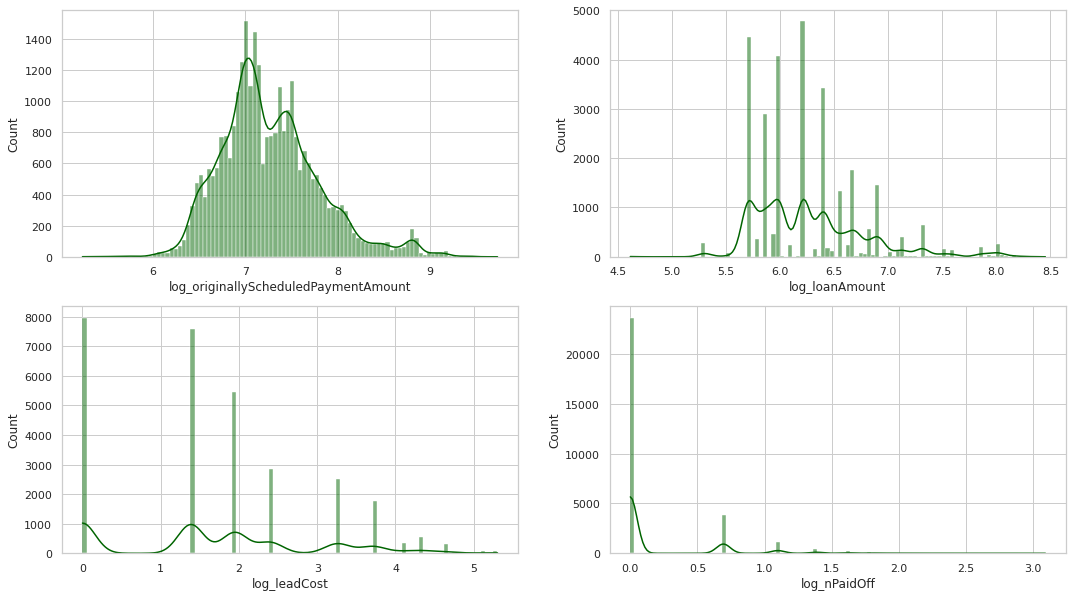

In [98]:
#Distribution of the variables after log transformation
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('')

sns.histplot(ax=axes[0,0], x= df_log['log_originallyScheduledPaymentAmount'],bins=100,color='darkgreen', kde= True)
sns.histplot(ax=axes[0,1], x= df_log['log_loanAmount'],bins=100,color='darkgreen', kde= True)
sns.histplot(ax=axes[1,0], x= df_log['log_leadCost'],bins=100,color='darkgreen', kde= True)
sns.histplot(ax=axes[1,1], x= df_log['log_nPaidOff'],bins=100,color='darkgreen', kde= True)
plt.show()

In [106]:
# Merging the log transformed variable to the dataset
combined_df_log = pd.concat([combined_df,df_log], axis=1, sort=False)
combined_df_log.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,state,leadType,fpStatus,clarityFraudId,hasCF,target,Default_ratio_per_state,underwritingid,loanAmount,clearfraudscore,leadCost,originallyScheduledPaymentAmount,ssnLoanCount,HoursTaken,log_originallyScheduledPaymentAmount,log_loanAmount,log_nPaidOff,log_leadCost
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,Paid Off Loan,CA,prescreen,Checked,569eb3a3e4b096699f685d64,1,0,1.901639,569eb3a3e4b096699f685d64,3000.0,879.0,0.0,6395.19,1,17,8.763458,8.006701,0.000000,0.000000
1,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,Paid Off Loan,CA,bvMandatory,Checked,578f9346e4b0810ad5e7b72e,1,0,1.901639,578f9346e4b0810ad5e7b72e,800.0,624.0,10.0,2432.08,1,53,7.796913,6.685861,0.000000,2.397895
2,LL-I-11462356,51db602c1b1f0188e409df8c872e7750,B,199.0,2016-08-25 19:39:50.049,2016-08-30 15:39:33.206,0.0,External Collection,CA,prescreen,Checked,57bf4981e4b033e6e9914132,1,1,1.901639,57bf4981e4b033e6e9914132,3000.0,831.0,0.0,6651.74,1,115,8.802784,8.006701,0.000000,0.000000
3,LL-I-08702744,4fd612cc7997a3a100ee9bd0a69ffb2a,M,251.0,2016-04-14 13:53:15.652,2016-04-14 15:03:08.306,0.0,Paid Off Loan,CA,prescreen,Checked,570fa0c5e4b06ef485d74a90,1,0,1.901639,570fa0c5e4b06ef485d74a90,2600.0,949.0,0.0,6435.35,1,1,8.769717,7.863651,0.000000,0.000000
4,LL-I-12203495,726df523f8344aea16d3c550c4d3802a,B,208.0,2016-11-22 23:08:45.558,2016-11-23 00:18:28.867,1.0,External Collection,CA,organic,Checked,NaN,0,1,1.901639,NaN,2600.0,854.0,0.0,7991.80,1,1,8.986296,7.863651,0.693147,0.000000


##  Dropping Less Important Variables for Model Building

In [107]:
final_df = combined_df_log.drop(['loanId','underwritingid','clarityFraudId', 'anon_ssn','applicationDate','originatedDate','loanStatus', 'originallyScheduledPaymentAmount', 'loanAmount', 'nPaidOff', 'leadCost', 'fpStatus', 'state'], axis=1)

In [66]:
# Replace boolean values with int values
#final_df.replace({False: 0, True: 1}, inplace=True)

In [108]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29518 entries, 0 to 29517
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   payFrequency                          29518 non-null  object 
 1   apr                                   29518 non-null  float64
 2   leadType                              29518 non-null  object 
 3   hasCF                                 29518 non-null  int64  
 4   target                                29518 non-null  int64  
 5   Default_ratio_per_state               29518 non-null  float64
 6   clearfraudscore                       29518 non-null  float64
 7   ssnLoanCount                          29518 non-null  int64  
 8   HoursTaken                            29518 non-null  int64  
 9   log_originallyScheduledPaymentAmount  29518 non-null  float64
 10  log_loanAmount                        29518 non-null  float64
 11  log_nPaidOff   

In [109]:
# Checking the distribution of the target variable
final_df['target'].value_counts(normalize=True)

1    0.588895
0    0.411105
Name: target, dtype: float64

## Feature Transformation: One Hot Encoding

In [112]:
# Perform one hot encoding
df_encoded = pd.get_dummies(final_df)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29518 entries, 0 to 29517
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   apr                                   29518 non-null  float64
 1   hasCF                                 29518 non-null  int64  
 2   target                                29518 non-null  int64  
 3   Default_ratio_per_state               29518 non-null  float64
 4   clearfraudscore                       29518 non-null  float64
 5   ssnLoanCount                          29518 non-null  int64  
 6   HoursTaken                            29518 non-null  int64  
 7   log_originallyScheduledPaymentAmount  29518 non-null  float64
 8   log_loanAmount                        29518 non-null  float64
 9   log_nPaidOff                          29518 non-null  float64
 10  log_leadCost                          29518 non-null  float64
 11  payFrequency_B 

# Saving the preprocessed dataset for model training in part-2

In [113]:
# Save the merged file to the local directory
df_encoded.to_csv('./data/merged.csv', index_label= False)